# SISTEM PENDUKUNG KEPUTUSAN PEMILIHAN TELEPON SELULER MENGGUNAKAN METODE FUZZY MAMDANI 

Logika Fuzzy merupakan suatu cara yang tepat untuk memetakan suatu ruang masukan (input) ke dalam suatu ruang keluaran (output). (Heru Dibyo Laksono & Hansi Effendi, 2011). Adapun alasan menggunakan logika fuzzy pada paper ini antara lain; Konsep logika fuzzy lebih mudah dipahami dan logika fuzzy jika terdapat data yang ambigu memiliki toleransi. Secara umum, sistem logika fuzzy memiliki 4 elemen yaitu;

1. Basis aturan yang berisi aturan-aturan yang bersumber dari pakar.
2. Suatu mekanisme pengambilan keputusan dimana pakar mengambil
keputusan dengan menerapkan pengetahuan yang dimiliki.
3. Proses fuzzifikasi (fuzzification) yang merubah besaran tegas (crisp) ke
dalam besaran fuzzy;
4. Proses defuzzifikasi (defuzzification), merupakan kebalikan dari proses
fuzzikasi yaitu merubah besaran fuzzy hasil dari inference engine, menjadi besaran tegas (crisp).


**LATAR BELAKANG SISTEM**

Banyaknya  jenis  telepon seluler yang  tersedia  dipasaran  membuat para konsumen  menjadi  kesulitan  untuk  menentukan pilihannya. Permasalahan  yang  dipilih adalah  membangun sistem  pendukung  pengambilan  keputusan  untuk membantu  memberikan pilihan  ponsel  bagi  para konsumen  berdasarkan  kriteria-kriteria  yang diinginkan oleh konsumen tersebut.  Kriteria  yang  digunakan  dalam  membantu menentukan  pilihan  ponsel  yang  diinginkan konsumen  antara  lain  berdasarkan  pada  harga dan kualitas kamera yang dijadikan sebagai input dalam sistem fuzzy yang akan dibuat. Penentuan keputusan untuk membantu memberikan pilihan  ponsel berdasarkan kriteria-kriteria yang diinginkan oleh para konsumen pada umumnya merupakan output dari sistem ini.

**Antecedents (Inputs)**


o  **Harga Ponsel**
	
         Fuzzy set:  Murah  (100-4000)
                     Normal (2000-8000)
                     Mahal  (4000-20000)
  
o  **Kamera Ponsel**
	
         Fuzzy set:  Buram  (1-2)
                     Sedang (1-4)
                     Jernih (2-6) 
                  
**Consequents (Outputs)**
    
o  **Pemilihan Telepon Seluler**

         Fuzzy set:  Kurang Direkomendasi  (1-40)
                     Dipertimbangkan       (20-80)
                     Sangat Direkomendasi  (40-100)


# Blok Diagram Sistem Pendukung Keputusan Pemilihan Ponsel
Berikut blok diagram dari sistem pendukung keputusan pemilihan ponsel.

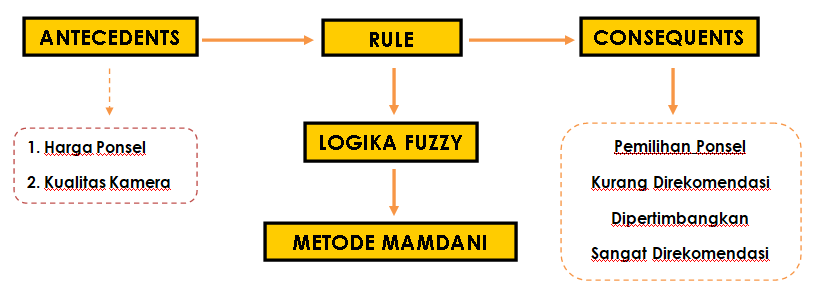

In [6]:
Image(filename = "blokdiagram.png")

# 1. IMPORT LIBRARY FUZZY
Library numpy adalah kumpulan function perhitungan dasar untuk bahasa Python. Library skfuzzy adalah kumpulan function fuzzy logic untuk bahasa Python. Library matplotlib digunakan untuk plotting hasil dalam bentuk visual (gambar).

In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [8]:
from IPython.display import Image
PATH = "C:/Users/ACER/uts ai/Fuzzy-09011281722055 Ghina Auliya/"

# 2. FUZZYFIKASI
Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)


## A. Variabel Linguistik Untuk Input
Pada sistem ini memanfaatkan 2 kategori input diantaranya yaitu `harga ponsel` yang diberi label 'harga' dan `kualitas kamera` diberi label 'kamera'.

In [9]:
harga = ctrl.Antecedent(np.arange(100, 20000, 100), 'harga')
harga_x = np.arange(100,20000,100) #untuk plotting saja
kamera = ctrl.Antecedent(np.arange(1, 6, 1), 'kamera')
kamera_x = np.arange(1, 6, 1) #untuk plotting saja

## B. Variabel Linguistik Untuk Output
Pada sistem ini menghasilkan 1 kategori output yaitu `persentase pemilihan ponsel` yang diberi label 'pemilihan ponsel'.

In [10]:
pemilihan_ponsel = ctrl.Consequent(np.arange(1, 100, 1),'pemilihan ponsel')
pemilihan_x = np.arange(1, 100, 1) #untuk plotting saja

Penggunaan `antecedent` adalah premis atau sebagai inputnya, dan `consequent` sebagai kesimpulan atau outputnya. Dan angka-angka di dalam kurung tersebut adalah batas-batasnya yang formatnya adalah _**(batas awal, batas akhir, kelipatan)**_. Lalu diberikan label dengan nama variabelnya.

# Representasi Kurva

Sistem ini menggunakan fungsi `Trapesium`, dimana a,b,c, dan d merupakan batas-batas dari himpunan fuzzy 

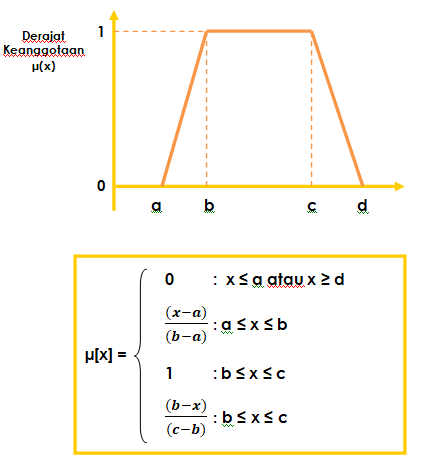

In [11]:
Image(filename = "kurva trapesium.png")

Sistem ini menggunakan fungsi `Segitiga`, dimana a,b, dan c merupakan batas-batas dari himpunan fuzzy 

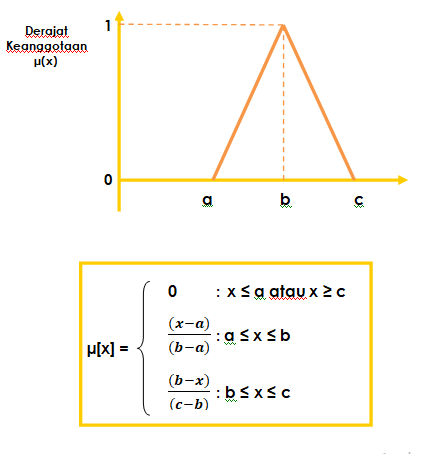

In [12]:
Image(filename = "kurva segitiga.png")

Karena kita akan menggunakan kurva trapesium dan segitiga, maka fungsi yang akan digunakan adalah `fuzz.trimf` dan `fuzz.trapmf` lalu untuk mendefinisikan domainnya, digunakan `variabel.universe` yang selanjutnya memasukkan batas-batasnya (domain), formatnya adalah `[batas awal, titik puncak, batas akhir)`. Perintahnya adalah:
`variabel['nama himpunan fuzzy'] = fuzz.trimf(variabel.universe, [batas awal, titik puncak, batas akhir])`
`variabel['nama himpunan fuzzy'] = fuzz.trapmf(variabel.universe, [batas awal, titik puncak, batas akhir,batas akhir])`

## C. Membership Function dan Nilai Linguistik Untuk Input

### MEMBERSHIP FUNCTION DAN NILAI LINGUISTIK HARGA
Untuk harga ponsel, `membership function` dibagi menjadi 3 bagian :
$$ Harga Ponsel $$
$$ Murah = 100 - 4000 $$
$$ Normal = 2000 - 8000 $$
$$ Mahal = 4000 - 20000 $$

 Jika harga ponsel adalah variabel linguistik, maka `nilai linguistik` untuk variabel `harga` yaitu `murah`, `normal`, dan `mahal`. Maka membership function dirumuskan sebagai berikut:

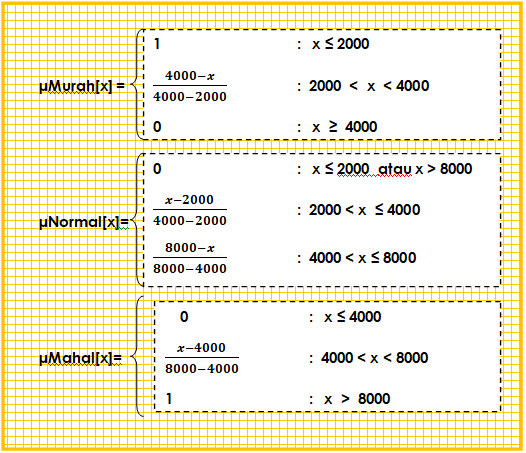

In [13]:
Image(filename = "fharga.png") 

**Range Harga (Rp)**

In [14]:
harga['murah'] = fuzz.trapmf(harga.universe, [100,100,2000,4000]) #dari 100 hingga 4000
harga['normal'] = fuzz.trimf(harga.universe, [2000,4000,8000]) #dari 2000 hingga 8000
harga['mahal'] = fuzz.trapmf(harga.universe, [4000,8000,20000,20000]) #dari 4000 hingga 20000

### PLOTTING MEMBERSHIP FUNCTION HARGA

Plotting membership function $\mu Murah(x)$

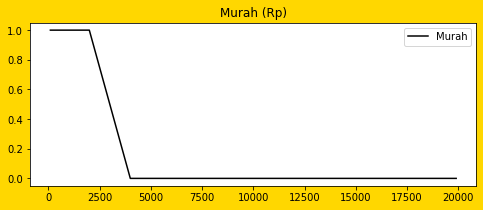

In [15]:
harga_murah = fuzz.trapmf(harga_x,[100,100,2000,4000])

fig, (ax0) = plt.subplots(nrows=1, facecolor='gold', figsize=(8, 3))
ax0.plot(harga_x,harga_murah, 'black', linewidth=1.5, label='Murah')
ax0.set_title('Murah (Rp)')
ax0.legend()

Plotting membership function $\mu Normal(x)$

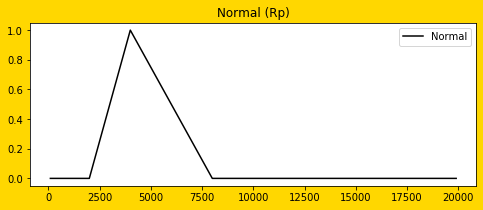

In [16]:
harga_normal = fuzz.trimf(harga_x,[2000,4000,8000])

fig, (ax1) = plt.subplots(nrows=1, facecolor='gold', figsize=(8, 3))
ax1.plot(harga_x,harga_normal, 'black', linewidth=1.5, label='Normal')
ax1.set_title('Normal (Rp)')
ax1.legend()

Plotting membership function $\mu Mahal(x)$

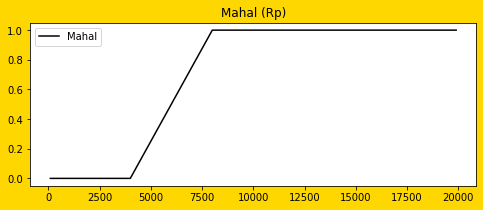

In [17]:
harga_mahal = fuzz.trapmf(harga_x,[4000,8000,20000,20000])

fig, (ax2) = plt.subplots(nrows=1, facecolor='gold', figsize=(8, 3))
ax2.plot(harga_x,harga_mahal, 'black', linewidth=1.5, label='Mahal')
ax2.set_title('Mahal (Rp)')
ax2.legend()

**Plotting keseluruhan membership function**

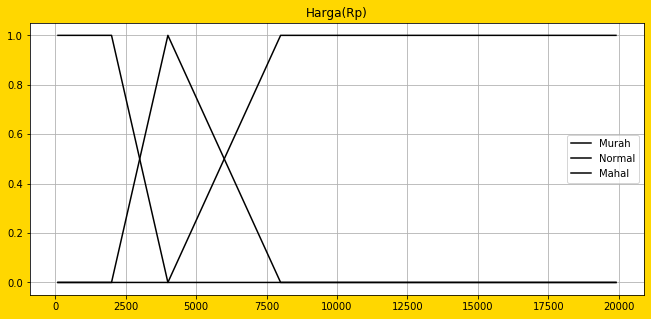

In [18]:
fig, (ax3) = plt.subplots(nrows=1, facecolor='gold', figsize=(11, 5))
ax3.plot(harga_x, harga_murah, 'black', linewidth=1.5, label='Murah')
ax3.plot(harga_x, harga_normal, 'black', linewidth=1.5, label='Normal')
ax3.plot(harga_x, harga_mahal, 'black', linewidth=1.5, label='Mahal')
ax3.set_title('Harga(Rp)')
ax3.grid()
ax3.legend()

### MEMBERSHIP FUNCTION DAN NILAI LINGUISTIK KAMERA
Untuk kualitas kamera, `membership function` dibagi menjadi 3 bagian :
$$ Kamera $$
$$ Buram = 1 - 2 $$
$$ Sedang = 1 - 4 $$
$$ Jernih = 2 - 6 $$

Jika kamera ponsel adalah variabel linguistik, maka `nilai linguistik` untuk variabel `kamera` yaitu `buram`, `sedang`, dan `jernih`. Maka membership function dirumuskan sebagai berikut:

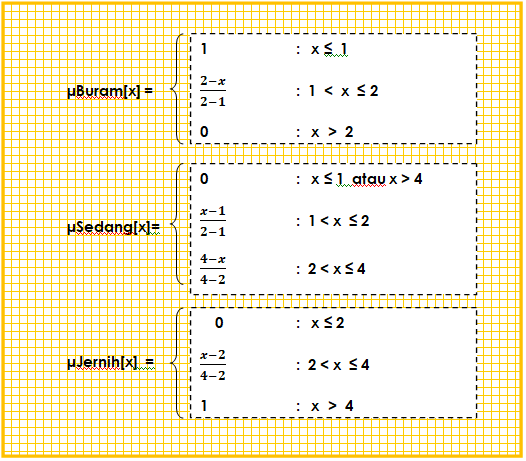

In [19]:
Image(filename = "fungsi kamera.png")

**Range Kamera**

In [20]:
kamera['buram'] = fuzz.trapmf(kamera.universe, [1,1,1,2])
kamera['sedang'] = fuzz.trimf(kamera.universe, [1,2,4])
kamera['jernih'] = fuzz.trapmf(kamera.universe, [2,4,6,6])

### PLOTTING MEMBERSHIP FUNCTION KAMERA

Plotting membership function $\mu Buram(x)$

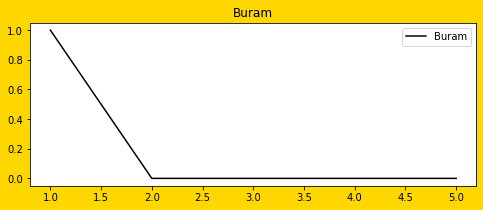

In [21]:
kamera_buram = fuzz.trapmf(kamera_x,[1,1,1,2])

fig, (ax4) = plt.subplots(nrows=1, facecolor='gold', figsize=(8, 3))
ax4.plot(kamera_x,kamera_buram, 'black', linewidth=1.5, label='Buram')
ax4.set_title('Buram')
ax4.legend()

Plotting membership function $\mu Sedang(x)$

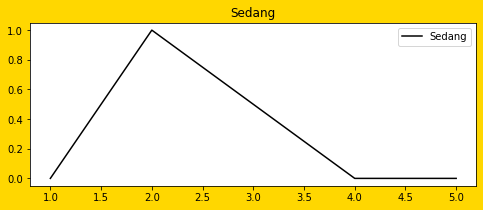

In [22]:
kamera_sedang = fuzz.trimf(kamera_x,[1,2,4])

fig, (ax5) = plt.subplots(nrows=1, facecolor='gold', figsize=(8, 3))
ax5.plot(kamera_x,kamera_sedang, 'black', linewidth=1.5, label='Sedang')
ax5.set_title('Sedang')
ax5.legend()

Plotting membership function $\mu Jernihx)$

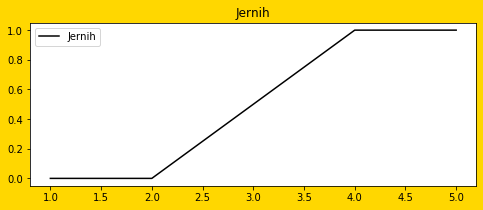

In [23]:
kamera_jernih = fuzz.trapmf(kamera_x,[2,4,6,6])

fig, (ax5) = plt.subplots(nrows=1, facecolor='gold', figsize=(8, 3))
ax5.plot(kamera_x,kamera_jernih, 'black', linewidth=1.5, label='Jernih')
ax5.set_title('Jernih')
ax5.legend()

**Plotting keseluruhan membership function**

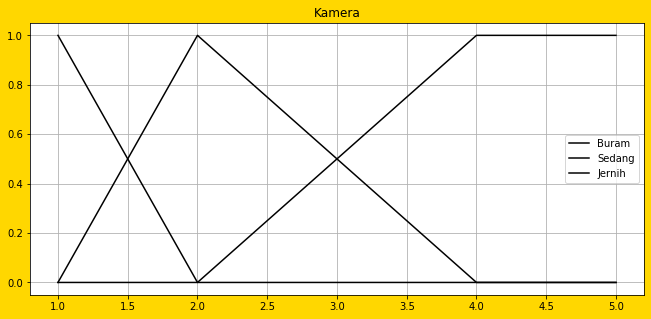

In [24]:
fig, (ax6) = plt.subplots(nrows=1, facecolor='gold', figsize=(11, 5))
ax6.plot(kamera_x, kamera_buram, 'black', linewidth=1.5, label='Buram')
ax6.plot(kamera_x, kamera_sedang, 'black', linewidth=1.5, label='Sedang')
ax6.plot(kamera_x, kamera_jernih, 'black', linewidth=1.5, label='Jernih')
ax6.set_title('Kamera')
ax6.grid()
ax6.legend()

## D. Membership Function dan Nilai Linguistik Untuk Output

### MEMBERSHIP FUNCTION DAN NILAI LINGUISTIK PEMILIHAN PONSEL 

Untuk pemilihan ponsel, `membership function` dibagi menjadi 3 bagian :
$$ Pemilihan Ponsel $$
$$ Kurang Direkomendasi = 1 - 40 $$
$$ Dipertimbangkan = 20 - 80 $$
$$ Sangat Direkomendasi = 40 - 100 $$

Jika pemilihan ponsel adalah variabel linguistik, maka `nilai linguistik` untuk variabel `pemilihan ponsel` yaitu `kurang direkomendasi` `dipertimbangkan`, dan `sangat direkomendasi`yang dinyatakan dalam satuan `persen (%)`. Maka membership function dirumuskan sebagai berikut:

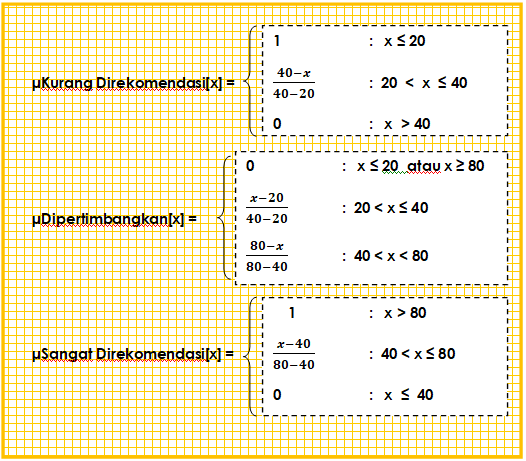

In [25]:
Image(filename = "fungsi output.png")

**Range Pemilihan Ponsel (%)**

In [26]:
pemilihan_ponsel['kurang direkomendasi'] = fuzz.trapmf(pemilihan_ponsel.universe, [1,1,20,40])
pemilihan_ponsel['dipertimbangkan'] = fuzz.trimf(pemilihan_ponsel.universe, [20,40,80])
pemilihan_ponsel['sangat direkomendasi'] = fuzz.trapmf(pemilihan_ponsel.universe, [40,80,100,100])

### PLOTTING MEMBERSHIP FUNCTION PEMILIHAN PONSEL

Plotting membership function $\mu Kurang Direkomendasi(x)$

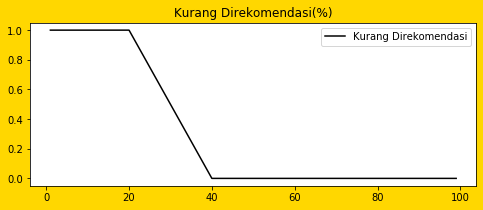

In [27]:
pemilihan_kurangdirekomendasi = fuzz.trapmf(pemilihan_x,[1,1,20,40])

fig, (ax7) = plt.subplots(nrows=1, facecolor='gold', figsize=(8, 3))
ax7.plot(pemilihan_x,pemilihan_kurangdirekomendasi, 'black', linewidth=1.5, label='Kurang Direkomendasi')
ax7.set_title('Kurang Direkomendasi(%)')
ax7.legend()

Plotting membership function $\mu Dipertimbangkan(x)$

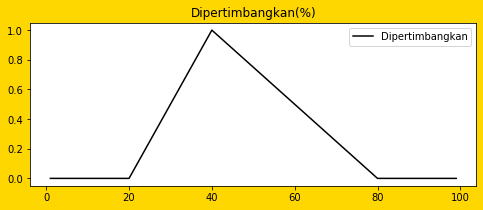

In [28]:
pemilihan_dipertimbangkan = fuzz.trimf(pemilihan_x,[20,40,80])

fig, (ax8) = plt.subplots(nrows=1, facecolor='gold', figsize=(8, 3))
ax8.plot(pemilihan_x,pemilihan_dipertimbangkan, 'black', linewidth=1.5, label='Dipertimbangkan')
ax8.set_title('Dipertimbangkan(%)')
ax8.legend()

Plotting membership function $\mu Sangat Direkomendasi(x)$

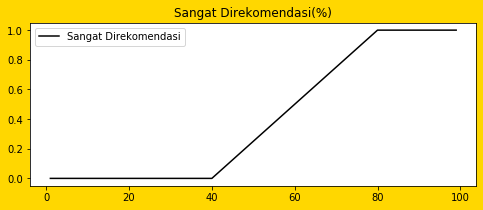

In [29]:
pemilihan_sangatdirekomendasi = fuzz.trapmf(pemilihan_x,[40,80,100,100])

fig, (ax9) = plt.subplots(nrows=1, facecolor='gold', figsize=(8, 3))
ax9.plot(pemilihan_x,pemilihan_sangatdirekomendasi, 'black', linewidth=1.5, label='Sangat Direkomendasi')
ax9.set_title('Sangat Direkomendasi(%)')
ax9.legend()

**Plotting keseluruhan membership function**

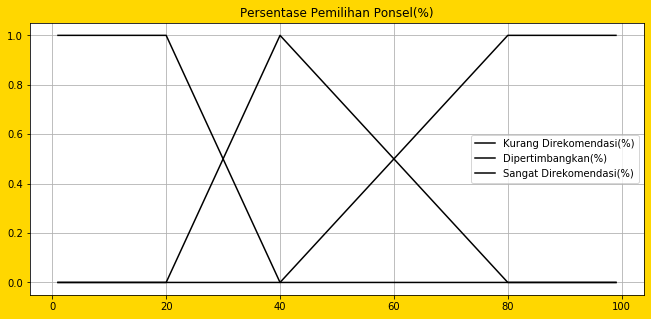

In [30]:
fig, (ax10) = plt.subplots(nrows=1, facecolor='gold', figsize=(11, 5))
ax10.plot(pemilihan_x, pemilihan_kurangdirekomendasi, 'black', linewidth=1.5, label='Kurang Direkomendasi(%)')
ax10.plot(pemilihan_x, pemilihan_dipertimbangkan, 'black', linewidth=1.5, label='Dipertimbangkan(%)')
ax10.plot(pemilihan_x, pemilihan_sangatdirekomendasi, 'black', linewidth=1.5, label='Sangat Direkomendasi(%)')
ax10.set_title('Persentase Pemilihan Ponsel(%)')
ax10.grid()
ax10.legend()

# 3. RULE BASE

`Rule Base`merupakan suatu sistem berbasis aturan dari suatu perangkat lunak yang menyajikan keahlian pakar dalam bentuk aturan-aturan pada suatu domain tertentu untuk menyelesaikan suatu permasalahan. 

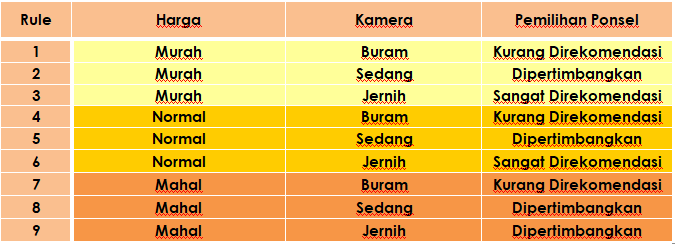

In [31]:
Image(filename = "rule-base.png")

In [32]:
rule1 = ctrl.Rule(harga['murah'] & kamera['buram'], pemilihan_ponsel['kurang direkomendasi'])
rule2 = ctrl.Rule(harga['murah'] & kamera['sedang'], pemilihan_ponsel['dipertimbangkan'])
rule3 = ctrl.Rule(harga['murah'] & kamera ['jernih'], pemilihan_ponsel['sangat direkomendasi'])
rule4 = ctrl.Rule(harga['normal'] & kamera ['buram'], pemilihan_ponsel['kurang direkomendasi'])
rule5 = ctrl.Rule(harga['normal'] & kamera ['sedang'], pemilihan_ponsel['dipertimbangkan'])
rule6 = ctrl.Rule(harga['normal'] & kamera ['jernih'], pemilihan_ponsel['sangat direkomendasi'])
rule7 = ctrl.Rule(harga['mahal'] & kamera ['buram'], pemilihan_ponsel['kurang direkomendasi'])
rule8 = ctrl.Rule(harga['mahal'] & kamera ['sedang'], pemilihan_ponsel['dipertimbangkan'])
rule9 = ctrl.Rule(harga['mahal'] & kamera ['jernih'], pemilihan_ponsel['dipertimbangkan'])

C:\Users\ACER\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\ACER\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2be563b25f8>)

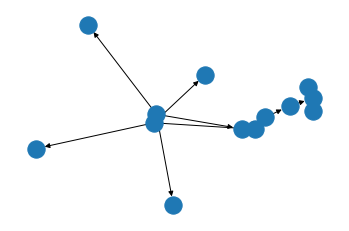

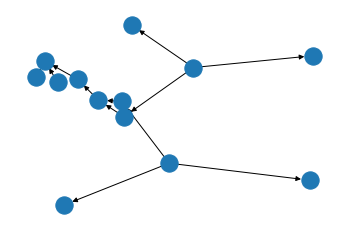

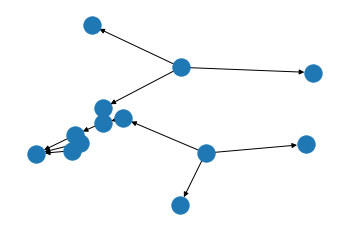

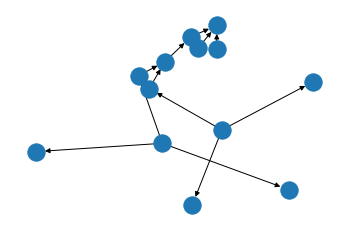

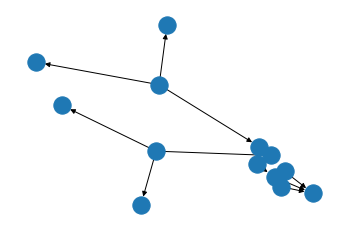

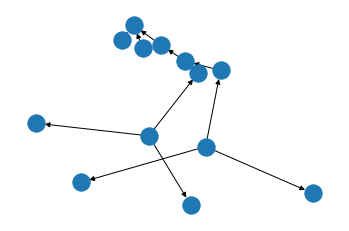

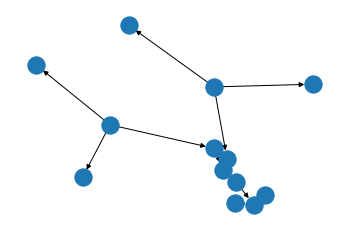

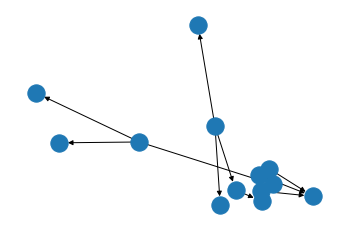

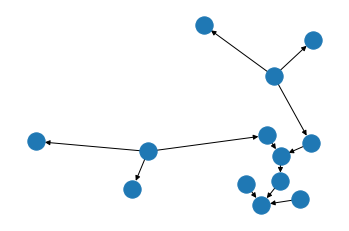

In [33]:
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()

# 4. MEKANISME INFERENSI
Suatu algoritma yang tidak bergantung pada suatu masalah tertentu yang digunakan untuk menentukan kesimpulan-kesimpulan atau menjalankan tindakan-tindakan menggunakan knowledge base (dasar pengetahuan).
Pada tahap inferensi ini kita akan membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk **IF** `KONDISI` **THEN** `KEPUTUSAN`.

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel harga yang berjumlah 3 dan fuzzifikasi dari variabel kamera yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 = 9 rule. 

1. **IF** Harga `MURAH` dan Kamera `BURAM`  **THEN** Pemilihan Ponsel `KURANG DIREKOMENDASI`
2. **IF** Harga `MURAH` dan Kamera `SEDANG` **THEN** Pemilihan Ponsel `DIPERTIMBANGKAN`
3. **IF** Harga `MURAH` dan Kamera `JERNIH` **THEN** Pemilihan Ponsel `SANGAT DIREKOMENDASI`

4. **IF** Harga `NORMAL`dan Kamera `BURAM`  **THEN** Pemilihan Ponsel `KURANG DIREKOMENDASI`
5. **IF** Harga `NORMAL`dan Kamera `SEDANG` **THEN** Pemilihan Ponsel `DIPERTIMBANGKAN`
6. **IF** Harga `NORMAL`dan Kamera `JERNIH` **THEN** Pemilihan Ponsel `SANGAT DIREKOMENDASI`

7. **IF** Harga `MAHAL` dan Kamera `BURAM`  **THEN** Pemilihan Ponsel `KURANG DIREKOMENDASI`
8. **IF** Harga `MAHAL` dan Kamera `SEDANG` **THEN** Pemilihan Ponsel `DIPERTIMBANGKAN`
9. **IF** Harga `MAHAL` dan Kamera `JERNIH` **THEN** Pemilihan Ponsel `DIPERTIMBANGKAN`

## Menggabungkan semua rule untuk dijadikan sebagai control system

In [34]:
pemilihan = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

Syntax **ctrl.ControlSystem** digunakan untuk menggabungkan beberapa rule yang ada dan melakukan set rule.

## Melakukan Simulasi Sistem

In [35]:
pemilihan = ctrl.ControlSystemSimulation(pemilihan)

# 5. DEFUZZYFIKASI 

### CONTOH KASUS

   `Dari data spesifikasi telepon seluler diambil data merek Vitell V711 dimana sampel Harga Rp 3.000.000 dan Kamera 4 MP`

Jika dilihat pada himpunan fuzzy, nilai 3000(=Rp 3.000.000) pada variabel harga berada di himpunan fuzzy **murah** dan **normal**, sedangkan untuk nilai 4 pada variabel kamera berada di himpunan **sedang** dan **jernih**.

## A. Perhitungan Komputasi 

Berikut adalah perhitungan `Komputasi` maka perintahnya adalah sebagai berikut:

#### Berdasarkan soal, kita masukkan input harga 4000(=Rp 4.000.000) dan kamera 8

In [36]:
pemilihan.input['harga'] = 3000
pemilihan.input['kamera'] = 3

#### Melakukan perhitungan defuzzifikasi

In [37]:
sistem_pemilihan = pemilihan.compute()

In [38]:
sistem_pemilihan = pemilihan.output['pemilihan ponsel']
print ("Perhitungan hasil komputasi = %.2f" % sistem_pemilihan)

Perhitungan hasil komputasi = 61.94


#### Plotting membership function pemilihan ponsel setelah dilakukan perhitungan defuzzifikasi output nilai pada pemilihan

## B. Perhitungan Manual 

**MENCARI DAERAH DERAJAT KEANGGOTAAN PADA FUNGSI BERDASARKAN INPUT**

### 1. Harga Ponsel = 3000(=Rp 3.000.000)

Input Harga Ponsel disesuaikan pada rangenya

                 Murah  : 100 - 4000
                 Normal : 2000 - 8000
                 Mahal  : 4000 - 20000
                 
Berdasarkan range input, harga ponsel = 3000 berada pada range variabel **Murah** dan juga range variabel **Normal**.

**>> RANGE VARIABEL MURAH**

Berikut fungsi untuk variabel harga **Murah** adalah

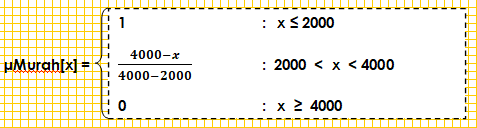

In [39]:
Image(filename = "range murah.png")

Adapun fungsi yang memenuhi adalah

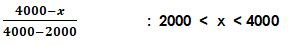

In [40]:
Image(filename = "harga.png")

Maka nilai input harga(x) dimasukkan ke dalam persamaan tersebut

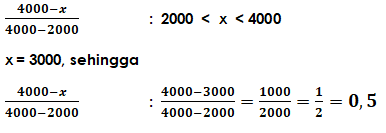

In [41]:
Image(filename = "input harga.png")

**Diperoleh nilai variabel harga pada range `Murah` adalah **0,5****

**>> RANGE VARIABEL NORMAL**

Berikut fungsi untuk variabel harga **Normal** adalah

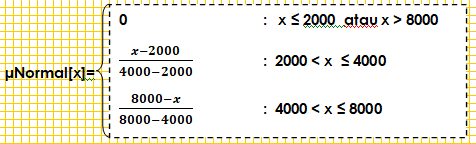

In [42]:
Image(filename = "range normal.png")

Adapun fungsi yang memenuhi adalah

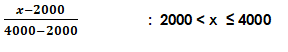

In [43]:
Image(filename = "normal.png")

Maka nilai input harga(x) dimasukkan ke dalam persamaan tersebut

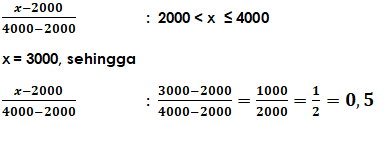

In [44]:
Image(filename = "input harga normal.png")

**Diperoleh nilai variabel harga pada range `Normal` adalah **0,5****

### 2. Kualitas Kamera = 3 MP

Input Kualitas Kamera disesuaikan pada rangenya

                 Buram  : 1 - 2
                 Sedang : 1 - 4
                 Jernih  : 2 - 6
                 
Berdasarkan range input, kamera = 3 berada pada range variabel **Sedang** dan juga range variabel **Jernih**.

**>> RANGE VARIABEL SEDANG**

Berikut fungsi untuk variabel kamera **Sedang** adalah

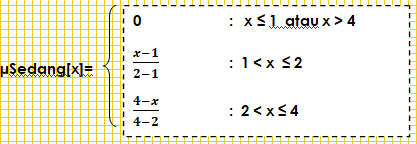

In [45]:
Image(filename = "sedang.png")

Adapun fungsi yang memenuhi adalah

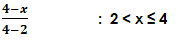

In [46]:
Image(filename = "sedang2.png")

Maka nilai input kamera(x) dimasukkan ke dalam persamaan tersebut

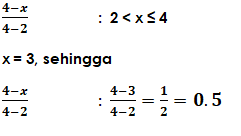

In [47]:
Image(filename = "input sedang2.png")

**Diperoleh nilai variabel kamera pada range `Sedang` adalah **0.5****

**>> RANGE VARIABEL JERNIH**


Berikut fungsi untuk variabel kamera **Jernih** adalah

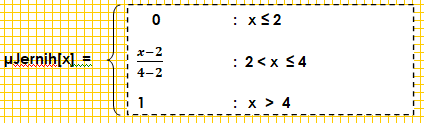

In [48]:
Image(filename = "jernih.png")

Adapun fungsi yang memenuhi adalah

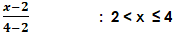

In [49]:
Image(filename = "jernih2.png")

Maka nilai input kamera(x) dimasukkan ke dalam persamaan tersebut

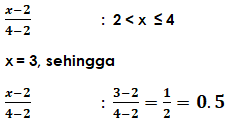

In [50]:
Image(filename = "input jernih2.png")

**Diperoleh nilai variabel kamera pada range `Jernih` adalah **0,5****

# EVALUASI RULE BASE

Selanjutnya adalah mencari fungsi implikasi dan diikuti defuzzyfikasi. Pada metode mamdani, fungsi implikasi yang digunakan adalah MIN atau menggunakan nilai minimum. Diambil dari rule based, maka ada **4 rule aktif** yang digunakan, yaitu:

   [RULE 2] IF Harga **MURAH** *(0.5)* dan Kamera **SEDANG** *(0.5)* THEN pemilihan **DIPERTIMBANGKAN** 
   
   [RULE 3] IF Harga **MURAH** *(0.5)* dan Kamera **JERNIH** *(0.5)* THEN pemilihan **SANGAT DIREKOMENDASI** 

   [RULE 5] IF Harga **NORMAL** *(0.5)* dan Kamera **SEDANG** *(0.5)* THEN pemilihan **DIPERTIMBANGKAN** 
   
   [RULE 6] IF Harga **NORMAL** *(0.5)* dan Kamera **JERNIH** *(0.5)* THEN pemilihan **SANGAT DIREKOMENDASI**
   
**Maka dapat kita simpulkan bahwa,**

   [RULE 2] Berdasarkan `fungsi implikasi MIN`, maka nilai yang diambil untuk Pemilihan **DIPERTIMBANGKAN**  adalah 0,5
   
   [RULE 3] Berdasarkan `fungsi implikasi MIN`, maka nilai yang diambil untuk Pemilihan **SANGAT DIREKOMENDASI** adalah 0,5
        
   [RULE 5] Berdasarkan `fungsi implikasi MIN`, maka nilai yang diambil untuk Pemilihan **DIPERTIMBANGKAN**  adalah 0,5
   
   [RULE 6] Berdasarkan `fungsi implikasi MIN`, maka nilai yang diambil untuk Pemilihan **SANGAT DIREKOMENDASI** adalah 0,5


# AGREGASI

Berdasarkan hasil evaluasi rule base, maka daerah yang sesuai dan akan dihitung luas samplingnya adalah daerah fungsi **Dipertimbangkan** yang berbentuk segitiga dan juga daerah fungsi **Sangat Direkomendasi** yang berbentuk setengah trapesium pada grafik output Pemlihan Ponsel. 

Pada daerah fungsi **Dipertimbangkan**, nilai membership function berada pada titik **0.5**. Sedangkan pada daerah fungsi **Sangat Direkomendasi** , nilai membership function berada pada titik **0.5** juga. 

Berikut gambar arsiran dari hasil hitung manual:

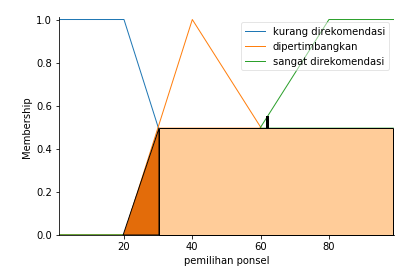

In [51]:
Image(filename = "gambar arsiran.png")

Jika wilayah arsirannya dipisah maka menjadi

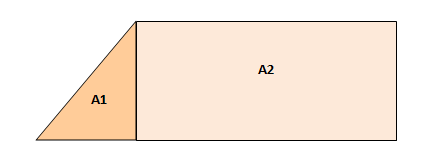

In [52]:
Image(filename = "wilayah arsiran.png")

Berikut adalah perhitungan manual dari contoh kasus diatas menggunakan **`METODE HITUNG LUAS SAMPLING`**.

Berdasarkan plot hasil output dapat dilakukan pengarsiran wilayah sampling yang dapat dicari menggunakan rumus berikut ini

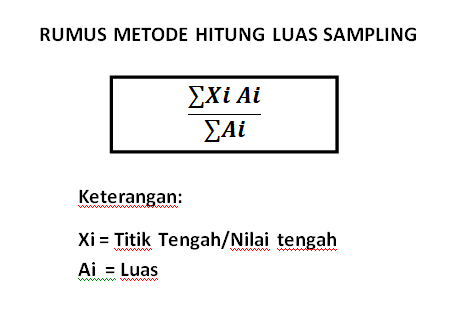

In [53]:
Image(filename = "rumus metode hitung luas.png")

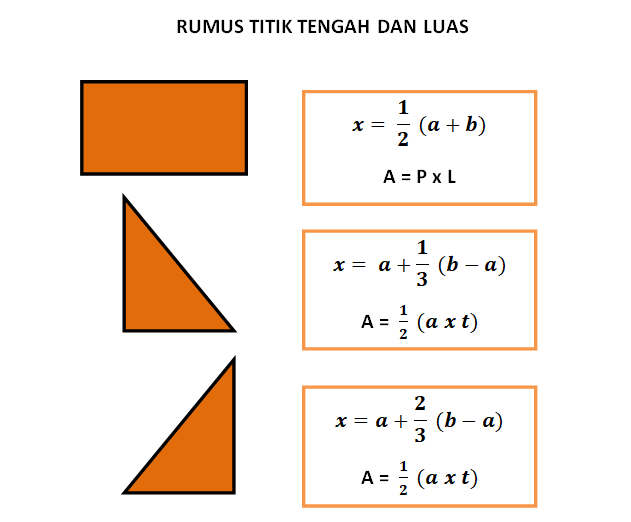

In [54]:
Image(filename = "rumus titiktengahdanluas.png")

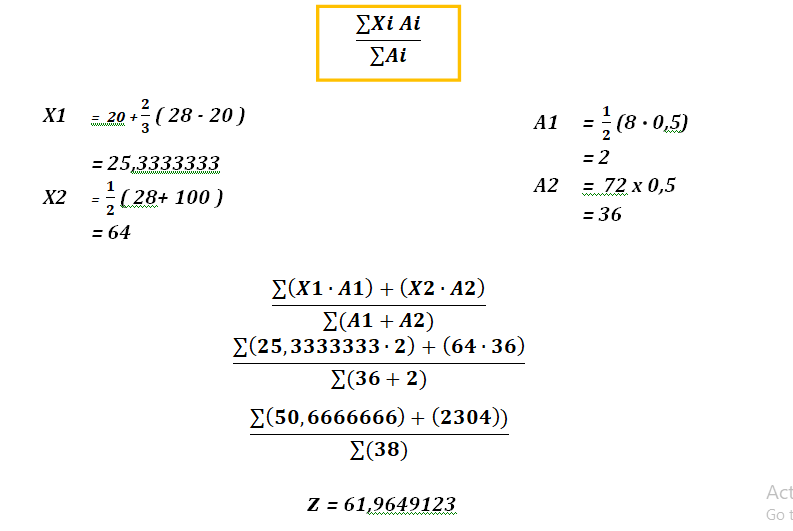

In [55]:
Image(filename = "hitung manual.png")

**AKURASI**

Perhitungan persentase **akurasi** antara perhitungan manual dengan perhitungan hasil komputasi

In [56]:
z = 61.9649123
akurasi = sistem_pemilihan*100/z
error = 100-akurasi
print ("Akurasi = %.2f" % akurasi + " %")
print ("Error = %.2f" % error  + " %")

Akurasi = 99.97 %
Error = 0.03 %


C:\Users\ACER\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


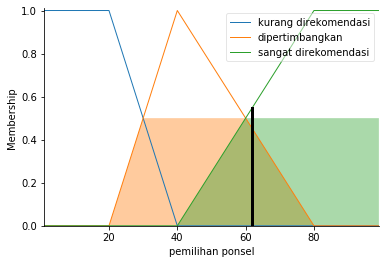

In [57]:
pemilihan_ponsel.view(sim=pemilihan)

Setelah melihat perhitungan diatas , maka dapat disimpulkan bahwa keputusan dalam pemilihan ponsel (X) tersebut tergolong pada keputusan **DIPERTIMBANGKAN**